## Analysing Covid-19 Geospatial Data

###### Essential libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

##### Reading data

In [2]:
# url = "https://proxy.hxlstandard.org/data/e2bb4b/download/jrc-covid-19-regions-hxl.csv"
# df = pd.read_csv(url)
df = pd.read_csv("data/jrc-covid-19-regions-hxl.csv")
df.head()

C:\Users\konar\AppData\Local\Temp\ipykernel_26044\2285626892.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/jrc-covid-19-regions-hxl.csv")


,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,#date,#country+code+iso3,#country+name,#adm1+name,#geo+lat,#geo+lon,#affected+positive+total,#affected+dead+total,#affected+recovered+total,#affected+positive,#affected+hospitalized,#affected+intensive_care,#indicator+eu,#indicator+eucpm,NaN
1,2020-01-22,GRC,Greece,NOT SPECIFIED,NaN,NaN,0,0,0,0,NaN,NaN,TRUE,TRUE,NaN
2,2020-01-22,ISL,Iceland,NOT SPECIFIED,NaN,NaN,0,0,0,0,NaN,NaN,FALSE,TRUE,NaN
3,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0,0,0,0,NaN,NaN,FALSE,FALSE,LI
4,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0,0,0,0,NaN,NaN,FALSE,FALSE,MC


In [3]:
df.dtypes

Date                   object
iso3                   object
CountryName            object
Region                 object
lat                    object
lon                    object
CumulativePositive     object
CumulativeDeceased     object
CumulativeRecovered    object
CurrentlyPositive      object
Hospitalized           object
IntensiveCare          object
EUcountry              object
EUCPMcountry           object
NUTS                   object
dtype: object

In [4]:
dtypes = {
    'Date':object,
    'iso3':object,
    'CountryName':object,
    'Region':object,
    'lat':float,
    'lon':float,
    'CumulativePositive':float,
    'CumulativeDeseased':float,
    'CumulativeRecovered':float,
    'CurrentlyPositive':float,
    'Hospitalized':float,
    'IntensiveCare':float,
    'EUCountry':bool,
    'EUCPMcountry':bool,
    'NUTS':object
}

In [5]:
#changing datatype and skipping irrelevant rows

df = pd.read_csv("data/jrc-covid-19-regions-hxl.csv", dtype=dtypes,skiprows=range(1,2))
df.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,2020-01-22,GRC,Greece,NOT SPECIFIED,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,True,True,NaN
1,2020-01-22,ISL,Iceland,NOT SPECIFIED,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,False,True,NaN
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555000,0.0,0.0,0.0,0.0,NaN,NaN,False,False,LI
3,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0.0,0.0,0.0,0.0,NaN,NaN,False,False,MC
4,2020-01-22,MKD,North Macedonia,North Macedonia,41.611000,21.751417,0.0,0.0,0.0,0.0,NaN,NaN,False,True,MK


In [6]:
df.shape

(134620, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134620 entries, 0 to 134619
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 134620 non-null  object 
 1   iso3                 134620 non-null  object 
 2   CountryName          134620 non-null  object 
 3   Region               134620 non-null  object 
 4   lat                  125839 non-null  float64
 5   lon                  125839 non-null  float64
 6   CumulativePositive   133475 non-null  float64
 7   CumulativeDeceased   107230 non-null  float64
 8   CumulativeRecovered  90577 non-null   float64
 9   CurrentlyPositive    134338 non-null  float64
 10  Hospitalized         61078 non-null   float64
 11  IntensiveCare        58272 non-null   float64
 12  EUcountry            134620 non-null  bool   
 13  EUCPMcountry         134620 non-null  bool   
 14  NUTS                 127495 non-null  object 
dtypes: bool(2), float

In [8]:
#chekcing the date range we have here
df.Date.max(), df.Date.min()

('2021-01-31', '2020-01-22')

### Converting pandas Dataframe to Geodataframe

we need to drop null values in ``lat`` ``lon``, before converting to geo data frame

In [9]:
df.dropna(subset=['lat','lon'],axis=0,inplace=True)

In [10]:
#creating CRS variable
crs = "EPSG:4326"

In [11]:
gdf = gpd.GeoDataFrame(df, crs=crs,geometry=gpd.points_from_xy(df.lon,df.lat))
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555000,0.0,0.0,0.0,0.0,NaN,NaN,False,False,LI,POINT (9.55500 47.16470)
3,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0.0,0.0,0.0,0.0,NaN,NaN,False,False,MC,POINT (7.42445 43.73835)
4,2020-01-22,MKD,North Macedonia,North Macedonia,41.611000,21.751417,0.0,0.0,0.0,0.0,NaN,NaN,False,True,MK,POINT (21.75142 41.61100)
5,2020-01-22,SMR,San Marino,San Marino,43.942973,12.460035,0.0,0.0,0.0,0.0,NaN,NaN,False,False,SM,POINT (12.46003 43.94297)
6,2020-01-22,SRB,Serbia,Serbia,44.206802,20.911009,0.0,0.0,0.0,0.0,NaN,NaN,False,True,NaN,POINT (20.91101 44.20680)


### Plotting GeoMaps for Covid-19 Deceased

<AxesSubplot:>

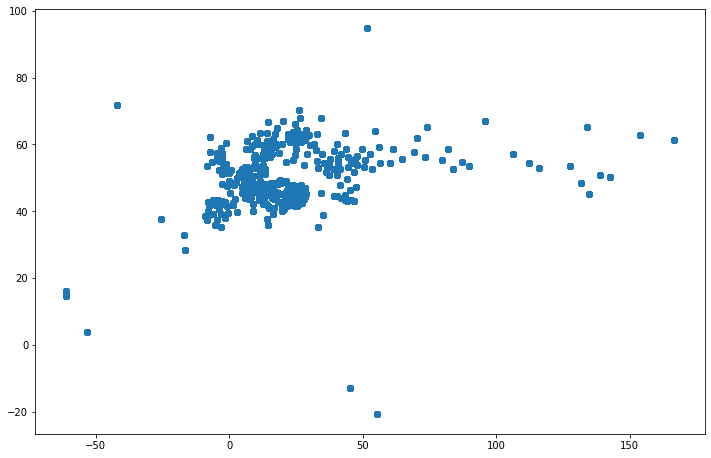

In [12]:
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(ax=ax)

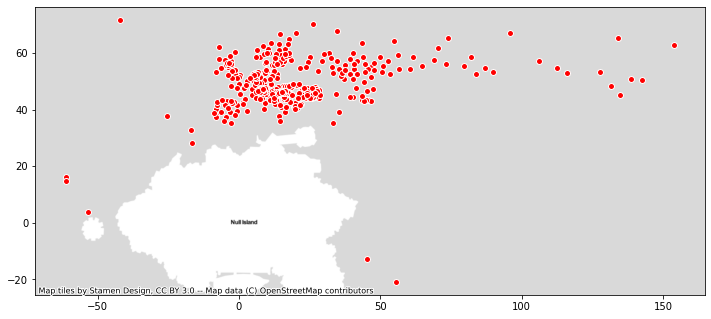

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=="2020-04-04"].plot(ax=ax, color="Red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

As we are now going to use tiles from the Open Street Map like webservice (e.g, Google Maps) for better visual purposes,
we need to use projected coordinate system, and will be in Sperical Mercator (EPSG 3857 or srid: 900913) 

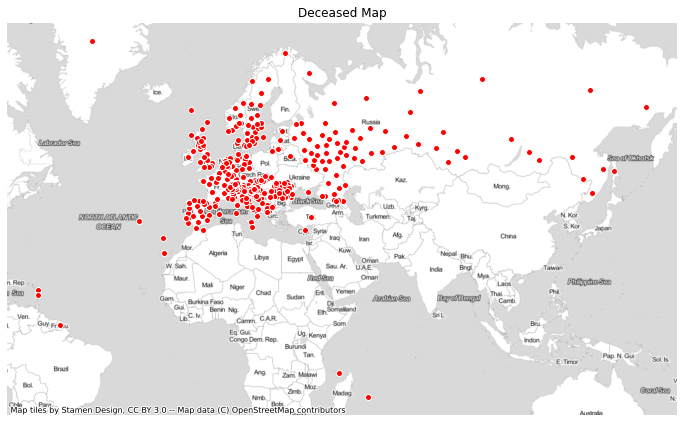

In [14]:
#Adding EPSG: 3857

fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=="2020-04-04"].to_crs(epsg=3857).plot(ax=ax, color="Red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("Deceased Map")
plt.axis("off");


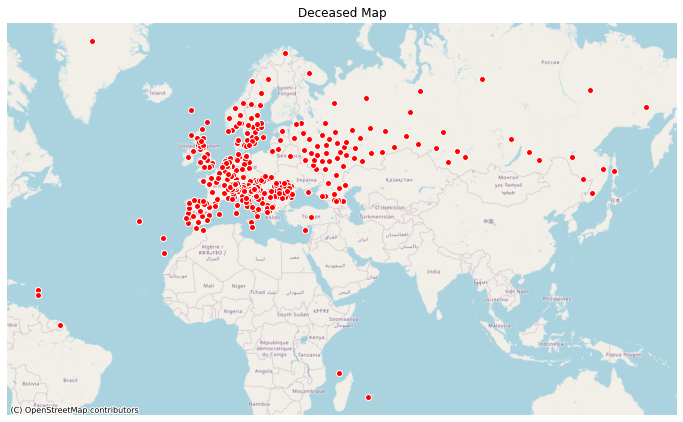

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=="2020-04-04"].to_crs(epsg=3857).plot(ax=ax, color="Red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Deceased Map")
plt.axis("off");

### Creating Bubble GeoMap as per Covid-19 deceased density

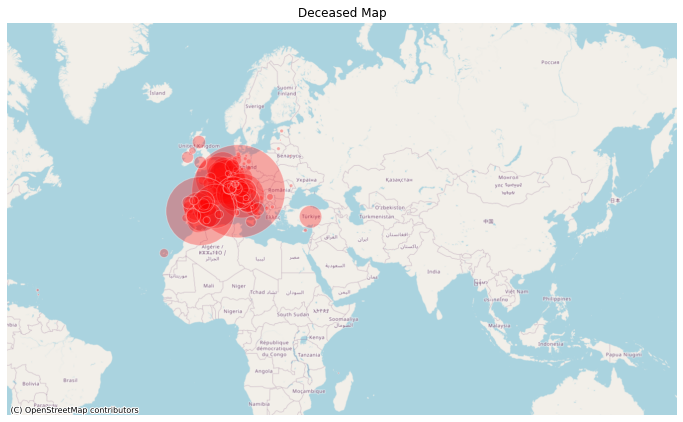

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=="2020-04-04"].to_crs(epsg=3857).plot(markersize="CumulativeDeceased",alpha=0.3,ax=ax, color="Red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Deceased Map")
plt.axis("off");


#### Normalizing death to a scale now

In [17]:
gdf["normalized_death"] = ((gdf["CumulativeDeceased"] - gdf["CumulativeDeceased"].min()) / 
                           (gdf["CumulativeDeceased"].max() - gdf["CumulativeDeceased"].min()))*100

In [18]:
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry,normalized_death
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555000,0.0,0.0,0.0,0.0,NaN,NaN,False,False,LI,POINT (9.55500 47.16470),0.0
3,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0.0,0.0,0.0,0.0,NaN,NaN,False,False,MC,POINT (7.42445 43.73835),0.0
4,2020-01-22,MKD,North Macedonia,North Macedonia,41.611000,21.751417,0.0,0.0,0.0,0.0,NaN,NaN,False,True,MK,POINT (21.75142 41.61100),0.0
5,2020-01-22,SMR,San Marino,San Marino,43.942973,12.460035,0.0,0.0,0.0,0.0,NaN,NaN,False,False,SM,POINT (12.46003 43.94297),0.0
6,2020-01-22,SRB,Serbia,Serbia,44.206802,20.911009,0.0,0.0,0.0,0.0,NaN,NaN,False,True,NaN,POINT (20.91101 44.20680),0.0


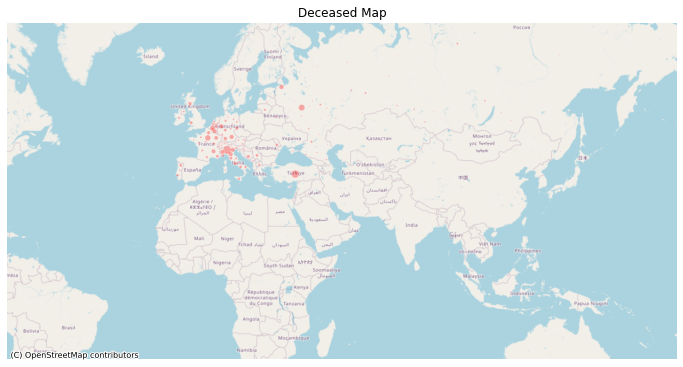

In [19]:
#now again plotting previous map with normalized_death
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=="2021-01-10"].to_crs(epsg=3857).plot(markersize="normalized_death",alpha=0.3,ax=ax, color="Red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Deceased Map")
plt.axis("off");


Join and Merge

In [21]:
eu_level2 = gpd.read_file("data/NUTS_RG_01M_2021_4326_LEVL_2.geojson")
eu_level2.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FRB0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0,NaN,NaN,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ..."
1,CZ04,CZ04,2,CZ,Severozápad,Severozápad,0,NaN,NaN,CZ04,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
2,CZ07,CZ07,2,CZ,Střední Morava,Střední Morava,0,NaN,NaN,CZ07,"POLYGON ((16.90792 50.44945, 16.92475 50.43939..."
3,DK02,DK02,2,DK,Sjælland,Sjælland,0,NaN,NaN,DK02,"MULTIPOLYGON (((11.77939 55.65903, 11.78305 55..."
4,ES12,ES12,2,ES,Principado de Asturias,Principado de Asturias,0,NaN,NaN,ES12,"MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43..."


<AxesSubplot:>

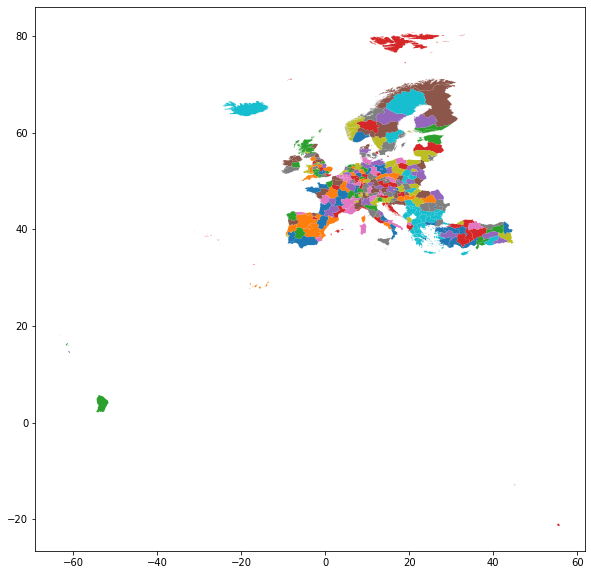

In [22]:
eu_level2.plot("NUTS_NAME", figsize=(12,10))

<AxesSubplot:>

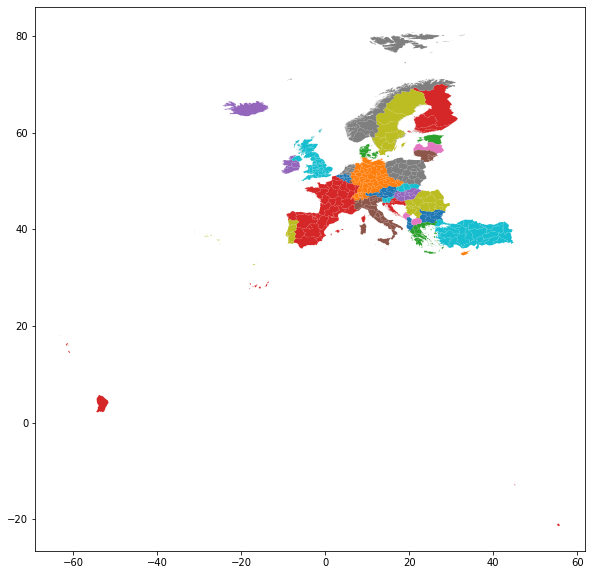

In [23]:
eu_level2.plot("CNTR_CODE", figsize=(12,10))

Spatil Join (EU level 2 and GDF created earlier)

In [24]:
spatial_joined = gpd.sjoin(gdf, eu_level2, predicate="within")
#op paramter is getting removed by "predicate"
spatial_joined.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,...,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
9,2020-01-23,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
18,2020-01-24,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
28,2020-01-25,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
38,2020-01-26,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00


In [25]:
sjoin_to_merge = spatial_joined[["Date","CumulativePositive","CumulativeDeceased","CumulativeRecovered","NUTS_ID"]]
merged_gdf = pd.merge(eu_level2, sjoin_to_merge[sjoin_to_merge["Date"] == "2021-01-26"],on="NUTS_ID",how = "inner")

In [26]:
#Now we have polygon data merged with covid statistics for each geolocation
merged_gdf.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Date,CumulativePositive,CumulativeDeceased,CumulativeRecovered
0,FRB0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0,NaN,NaN,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...",2021-01-26,0.0,1603.0,6351.0
1,DK02,DK02,2,DK,Sjælland,Sjælland,0,NaN,NaN,DK02,"MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...",2021-01-26,NaN,NaN,NaN
2,ES12,ES12,2,ES,Principado de Asturias,Principado de Asturias,0,NaN,NaN,ES12,"MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43...",2021-01-26,34214.0,1475.0,NaN
3,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-26,6036.0,138.0,4399.0
4,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-26,1678.0,30.0,1228.0


<AxesSubplot:>

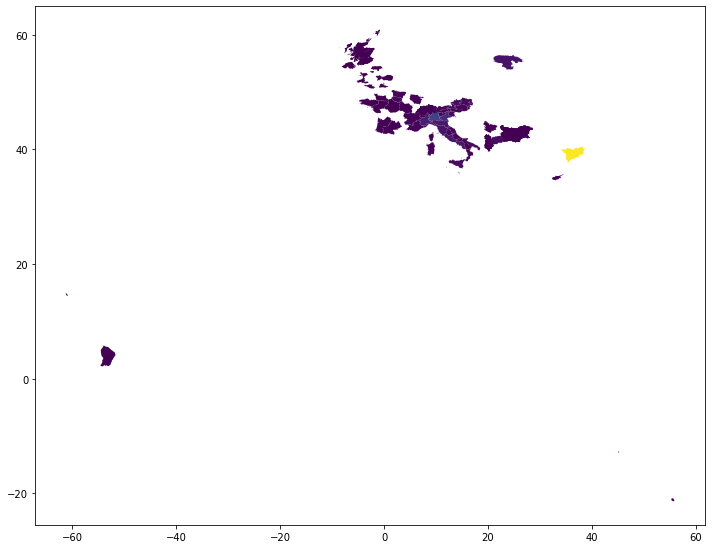

In [27]:
#eXample
merged_gdf.plot("CumulativeRecovered", figsize=(12,10))

Choropleth Map

###### #Adding population data to already created ``merged_gdf``

In [28]:
population = pd.read_csv("data/population_data.csv")
population.head()

,codes,labels,2019
0,BE,Belgium,11455519
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,1215290
2,BE10,Région de Bruxelles-Capitale/Brussels Hoofdste...,1215290
3,BE2,Vlaams Gewest,6596233
4,BE21,Prov. Antwerpen,1860470


In [29]:
merged_population = merged_gdf.merge(population, left_on="NUTS_ID", right_on="codes",how="left")
merged_population

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Date,CumulativePositive,CumulativeDeceased,CumulativeRecovered,codes,labels,2019
0,FRB0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0,NaN,NaN,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...",2021-01-26,0.0,1603.0,6351.0,FRB0,Centre - Val de Loire,2565258.0
1,DK02,DK02,2,DK,Sjælland,Sjælland,0,NaN,NaN,DK02,"MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...",2021-01-26,NaN,NaN,NaN,DK02,Sjælland,836738.0
2,ES12,ES12,2,ES,Principado de Asturias,Principado de Asturias,0,NaN,NaN,ES12,"MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43...",2021-01-26,34214.0,1475.0,NaN,ES12,Principado de Asturias,1022205.0
3,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-26,6036.0,138.0,4399.0,AL01,Veri,813758.0
4,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-26,1678.0,30.0,1228.0,AL01,Veri,813758.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,NO09,NO09,2,NO,Agder og Sør-Østlandet,Agder og Sør-Østlandet,0,0.0,0.0,NO09,"MULTIPOLYGON (((10.38433 59.53421, 10.37888 59...",2021-01-26,2987.0,NaN,NaN,NaN,NaN,NaN
326,NO0A,NO0A,2,NO,Vestlandet,Vestlandet,0,0.0,0.0,NO0A,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",2021-01-26,1175.0,NaN,NaN,NaN,NaN,NaN
327,NO0A,NO0A,2,NO,Vestlandet,Vestlandet,0,0.0,0.0,NO0A,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",2021-01-26,3401.0,NaN,NaN,NaN,NaN,NaN
328,NO0A,NO0A,2,NO,Vestlandet,Vestlandet,0,0.0,0.0,NO0A,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",2021-01-26,6151.0,NaN,NaN,NaN,NaN,NaN


In [30]:
merged_population.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   330 non-null    object  
 1   NUTS_ID              330 non-null    object  
 2   LEVL_CODE            330 non-null    int64   
 3   CNTR_CODE            330 non-null    object  
 4   NAME_LATN            330 non-null    object  
 5   NUTS_NAME            330 non-null    object  
 6   MOUNT_TYPE           330 non-null    int64   
 7   URBN_TYPE            21 non-null     float64 
 8   COAST_TYPE           21 non-null     float64 
 9   FID                  330 non-null    object  
 10  geometry             330 non-null    geometry
 11  Date                 330 non-null    object  
 12  CumulativePositive   324 non-null    float64 
 13  CumulativeDeceased   201 non-null    float64 
 14  CumulativeRecovered  138 non-null    float64 
 15  codes          

In [31]:
merged_population['CumulativeDeceased'] = merged_population['CumulativeDeceased'].fillna(0)
merged_population.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   330 non-null    object  
 1   NUTS_ID              330 non-null    object  
 2   LEVL_CODE            330 non-null    int64   
 3   CNTR_CODE            330 non-null    object  
 4   NAME_LATN            330 non-null    object  
 5   NUTS_NAME            330 non-null    object  
 6   MOUNT_TYPE           330 non-null    int64   
 7   URBN_TYPE            21 non-null     float64 
 8   COAST_TYPE           21 non-null     float64 
 9   FID                  330 non-null    object  
 10  geometry             330 non-null    geometry
 11  Date                 330 non-null    object  
 12  CumulativePositive   324 non-null    float64 
 13  CumulativeDeceased   330 non-null    float64 
 14  CumulativeRecovered  138 non-null    float64 
 15  codes          

In [32]:
merged_population["normalized_deceased"] = (merged_population["CumulativeDeceased"] / merged_population["2019"].astype("float") * 100)
merged_population.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   330 non-null    object  
 1   NUTS_ID              330 non-null    object  
 2   LEVL_CODE            330 non-null    int64   
 3   CNTR_CODE            330 non-null    object  
 4   NAME_LATN            330 non-null    object  
 5   NUTS_NAME            330 non-null    object  
 6   MOUNT_TYPE           330 non-null    int64   
 7   URBN_TYPE            21 non-null     float64 
 8   COAST_TYPE           21 non-null     float64 
 9   FID                  330 non-null    object  
 10  geometry             330 non-null    geometry
 11  Date                 330 non-null    object  
 12  CumulativePositive   324 non-null    float64 
 13  CumulativeDeceased   330 non-null    float64 
 14  CumulativeRecovered  138 non-null    float64 
 15  codes          

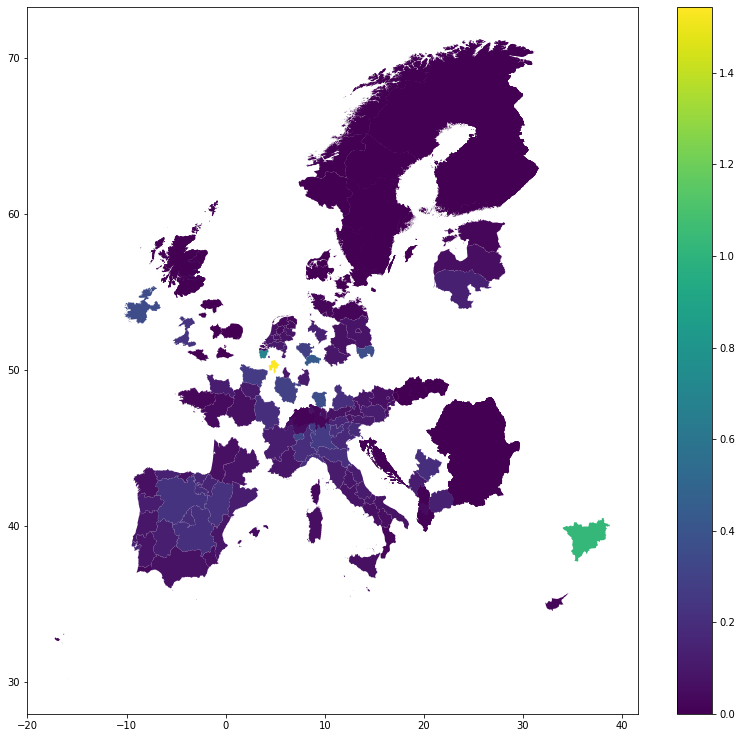

In [33]:
merged_population.cx[-20:60,30:70].plot("normalized_deceased",legend=True, figsize=(14,13));